In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, r2_score, mean_squared_error, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
import seaborn as sns

In [3]:
ds = pd.read_csv("Loan Approval Prediction.csv")
ds.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
#filling missing values
ds['LoanAmount'] = ds['LoanAmount'].fillna(ds['LoanAmount'].mean())
ds['Loan_Amount_Term'] = ds['Loan_Amount_Term'].fillna(ds['Loan_Amount_Term'].mean())
ds['Credit_History'] = ds['Credit_History'].fillna(ds['Credit_History'].mean())
ds.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [5]:
label_encoder = LabelEncoder()
categorical_columns = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area', 'Loan_Status']
for col in categorical_columns:
    ds[col] = label_encoder.fit_transform(ds[col])

In [6]:
X = ds.drop(columns=['Loan_ID', 'Loan_Status'])
y = ds['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
model = LogisticRegression(max_iter = 1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

C:\Users\prav5\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [9]:
class_report = classification_report(y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.93      0.43      0.59        65
           1       0.76      0.98      0.86       120

    accuracy                           0.79       185
   macro avg       0.85      0.71      0.72       185
weighted avg       0.82      0.79      0.76       185



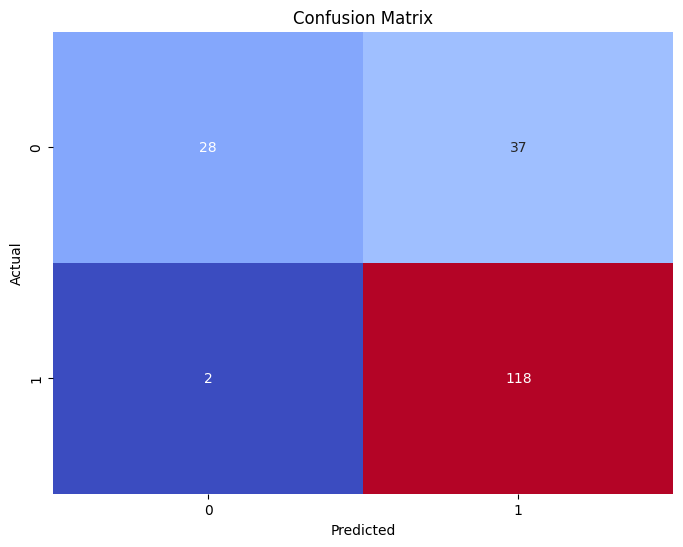

In [14]:

plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

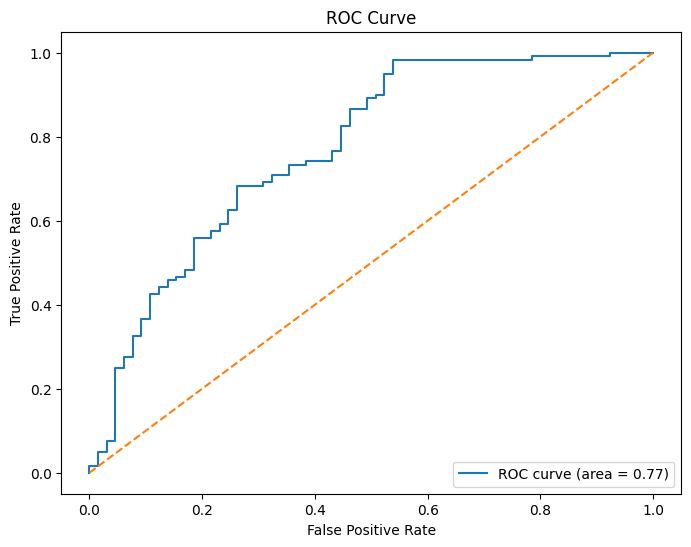

In [11]:
y_prob = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
fpr, tpr, _ = roc_curve(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

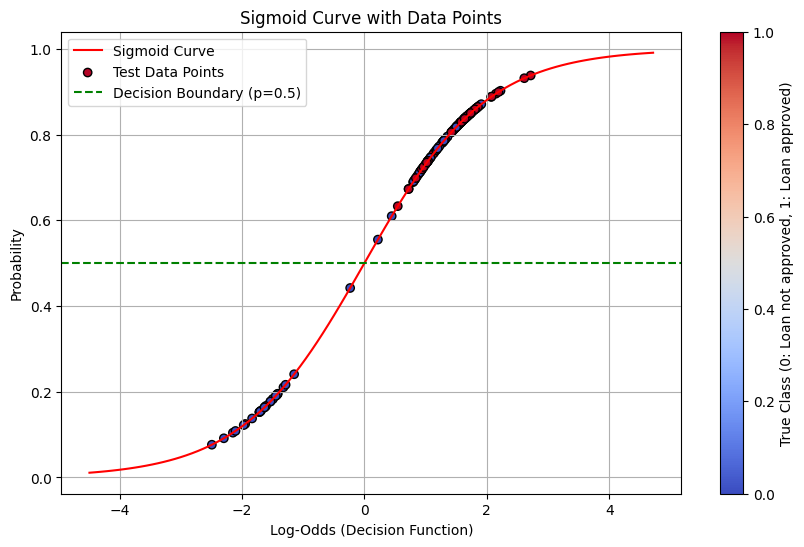

In [13]:
log_odds_test = model.decision_function(X_test)

# Sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


log_odds_range = np.linspace(min(log_odds_test) - 2, max(log_odds_test) + 2, 100)
probabilities_range = sigmoid(log_odds_range)

plt.figure(figsize=(10, 6))
plt.plot(log_odds_range, probabilities_range, color='red', label='Sigmoid Curve')

plt.scatter(log_odds_test, y_prob, c=y_test, cmap='coolwarm', edgecolors='k', label='Test Data Points')

plt.axhline(y=0.5, color='green', linestyle='--', label='Decision Boundary (p=0.5)')

plt.xlabel('Log-Odds (Decision Function)')
plt.ylabel('Probability')
plt.title('Sigmoid Curve with Data Points')
plt.legend()
plt.grid(True)
plt.colorbar(label='True Class (0: Loan not approved, 1: Loan approved)')
plt.show()

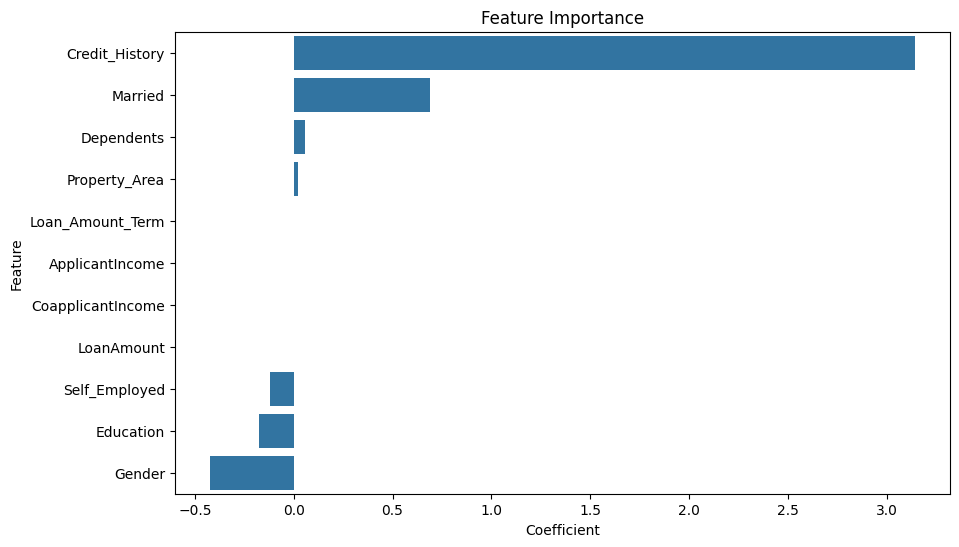

In [16]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
})
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients)
plt.title('Feature Importance')
plt.show()